# ***Network Intrusion Detection System Using Machine Learning***

---



---





In [268]:
#Libraries
import numpy as np # For numerical fast numerical calculations
import pandas as pd # Deals with data
import matplotlib.pyplot as plt # For making plots
import seaborn as sns # Makes beautiful plots
import sklearn
from mlxtend.plotting import plot_confusion_matrix
import tensorflow # Imports tensorflow
import keras # Imports keras
import matplotlib
import os
import time

time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [269]:
# Libraries
print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("seaborn : {0}".format(sns.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("sklearn : {0}".format(sklearn.__version__))
# print("imblearn : {0}".format(imblearn.__version__))


pandas : 1.2.1
numpy : 1.18.5
seaborn : 0.11.1
matplotlib : 3.3.2
sklearn : 0.23.2
time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [270]:
#Machine Learning
from sklearn.preprocessing import StandardScaler # Testing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
#Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [271]:
print(os.listdir('C:\\Users\Ahmed Glal\Desktop\ids'))

['.ipynb_checkpoints', 'All_Result.xlsx', 'books_read.png', 'dataset', 'foo.png', 'fosso.png', 'Images', 'Intrution_Detection.ipynb', 'sds.png', 'svm_conf.png', 'training_accuracy_figure.png', 'yourfilenamehere.png']
time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [272]:
# !pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [273]:
# Dataset field names
with open("C:\\Users\Ahmed Glal\Desktop\ids\dataset\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [274]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42
time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [275]:
with open('C:\\Users\\Ahmed Glal\\Desktop\\ids\\dataset\\training_attack_types','r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [276]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


time: 0 ns (started: 2021-02-21 12:08:04 +02:00)


In [277]:
# Loading Train Dataset
path = 'C:\\Users\\Ahmed Glal\\Desktop\\Intrusion-Detection-System-1master\\Intrusion-Detection-System-master\\dataset\\kddcup.data_10_percent.gz'
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


time: 1.84 s (started: 2021-02-21 12:08:04 +02:00)


In [278]:
# Descriptive statistics
da = df.describe()
da

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 1.08 s (started: 2021-02-21 12:08:06 +02:00)


In [279]:
df.shape

(494021, 43)

time: 15 ms (started: 2021-02-21 12:08:07 +02:00)


In [280]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

time: 47 ms (started: 2021-02-21 12:08:07 +02:00)


In [281]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

time: 31 ms (started: 2021-02-21 12:08:07 +02:00)


Mapping Different Attacks into 4 Major Attack Classes:

1.   Denial of Service (DoS)
2.   Probing Attack (Probe)
3.   User to Root Attack (U2R)
4.   Remote to Local Attack (R2L)



In [282]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

time: 0 ns (started: 2021-02-21 12:08:07 +02:00)


In [283]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

time: 141 ms (started: 2021-02-21 12:08:07 +02:00)


In [284]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

time: 15 ms (started: 2021-02-21 12:08:07 +02:00)


In [285]:
#Visualization 1
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

time: 0 ns (started: 2021-02-21 12:08:07 +02:00)


In [286]:
#Visualization 2
# def bar_graph(feature):   
#     plot = df[feature].value_counts().plot(kind="bar");
#     plot.set_title("Attack Class Distribution", fontsize=30);
#     plot.grid(color='lightblue', alpha=1.0);


time: 0 ns (started: 2021-02-21 12:08:07 +02:00)


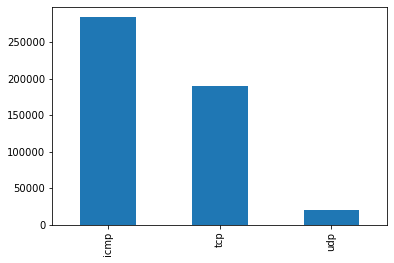

time: 156 ms (started: 2021-02-21 12:08:07 +02:00)


In [287]:
bar_graph('protocol_type')

In [402]:
plt.figure(figsize=(15,3))
bar_graph('service')

KeyError: 'service'

<Figure size 1080x216 with 0 Axes>

time: 78 ms (started: 2021-02-21 12:47:24 +02:00)


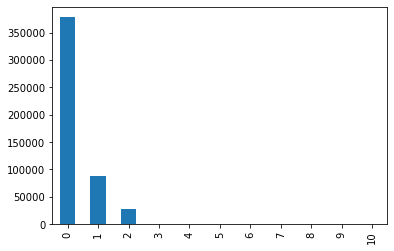

time: 203 ms (started: 2021-02-21 12:47:25 +02:00)


In [403]:
from pylab import savefig
bar_graph('flag')

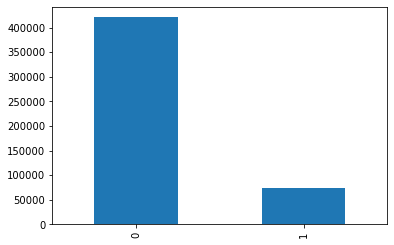

time: 140 ms (started: 2021-02-21 12:08:10 +02:00)


In [290]:
bar_graph('logged_in')

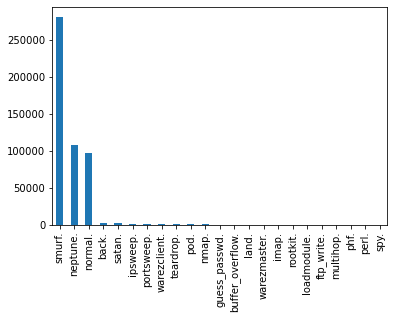

time: 360 ms (started: 2021-02-21 12:08:10 +02:00)


In [291]:
bar_graph('target')

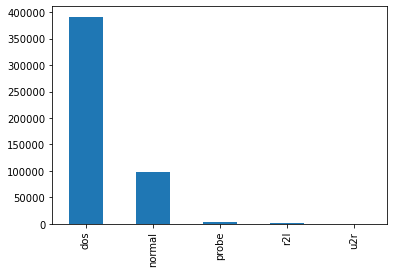

time: 187 ms (started: 2021-02-21 12:08:10 +02:00)


In [292]:
bar_graph('Attack Type')

In [293]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

time: 0 ns (started: 2021-02-21 12:08:11 +02:00)


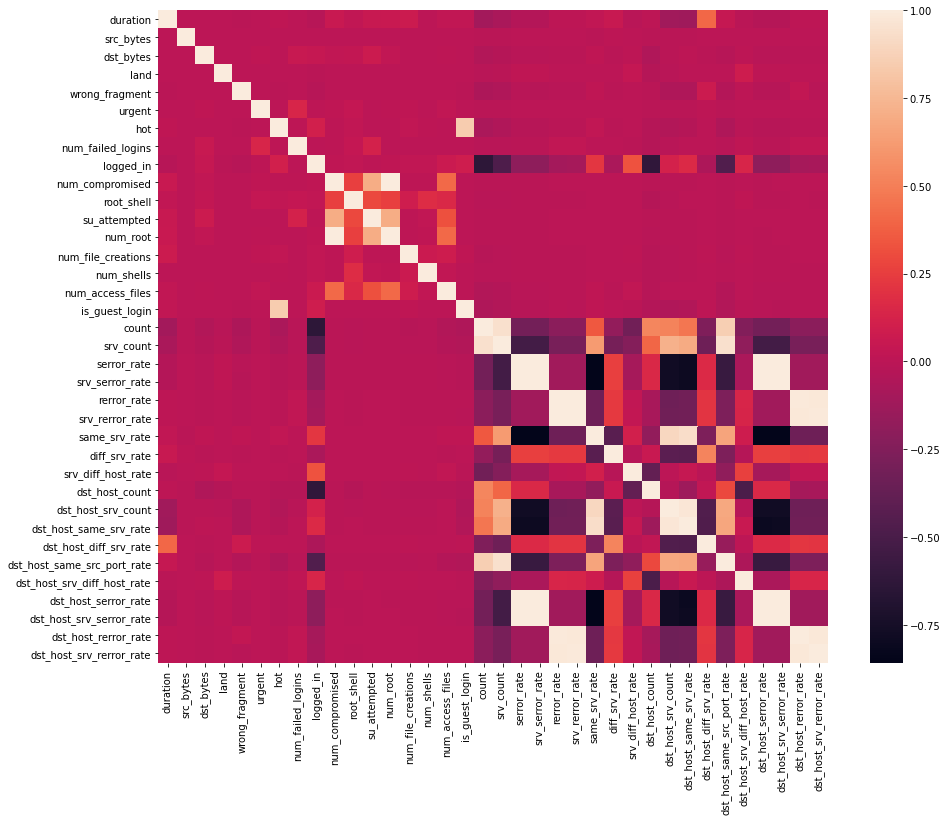

time: 6.51 s (started: 2021-02-21 12:08:11 +02:00)


In [294]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

heat=sns.heatmap(corr)

figure = heat.get_figure()    
figure.savefig('svm_conf.png', dpi=400 ,bbox_inches='tight')

# plt.savefig('foo.png', bbox_inches='tight', facecolor='w')
plt.show()

In [295]:
plt.savefig('fosso.png', bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

time: 0 ns (started: 2021-02-21 12:08:17 +02:00)


In [296]:
df['num_root'].corr(df['num_compromised'])

0.9938277978738366

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [297]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725952

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [298]:
df['srv_count'].corr(df['count'])

0.9436670688882655

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [299]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539817937

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [300]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953983

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [301]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373309

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [302]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110298

time: 15 ms (started: 2021-02-21 12:08:17 +02:00)


In [303]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691242

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [304]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324209

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [305]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783333

time: 15 ms (started: 2021-02-21 12:08:17 +02:00)


In [306]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105015

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [307]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373975

time: 15 ms (started: 2021-02-21 12:08:17 +02:00)


In [308]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485680104

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [309]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850098

time: 32 ms (started: 2021-02-21 12:08:17 +02:00)


In [310]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956001

time: 31 ms (started: 2021-02-21 12:08:17 +02:00)


In [311]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308375

time: 15 ms (started: 2021-02-21 12:08:17 +02:00)


In [312]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751249

time: 16 ms (started: 2021-02-21 12:08:17 +02:00)


In [313]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845669

time: 15 ms (started: 2021-02-21 12:08:18 +02:00)


In [314]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

time: 891 ms (started: 2021-02-21 12:08:18 +02:00)


In [315]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


time: 16 ms (started: 2021-02-21 12:08:18 +02:00)


In [316]:
df.shape

(494021, 33)

time: 15 ms (started: 2021-02-21 12:08:18 +02:00)


In [317]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

time: 0 ns (started: 2021-02-21 12:08:18 +02:00)


In [318]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

time: 297 ms (started: 2021-02-21 12:08:19 +02:00)


In [319]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

time: 31 ms (started: 2021-02-21 12:08:19 +02:00)


In [320]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

time: 63 ms (started: 2021-02-21 12:08:19 +02:00)


In [321]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

time: 31 ms (started: 2021-02-21 12:08:19 +02:00)


In [322]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

time: 46 ms (started: 2021-02-21 12:08:19 +02:00)


In [323]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


time: 32 ms (started: 2021-02-21 12:08:19 +02:00)


In [324]:
df.drop('service',axis = 1,inplace= True)

time: 187 ms (started: 2021-02-21 12:08:19 +02:00)


In [325]:
df.shape

(494021, 32)

time: 0 ns (started: 2021-02-21 12:08:19 +02:00)


In [326]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


time: 15 ms (started: 2021-02-21 12:08:19 +02:00)


In [327]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

time: 0 ns (started: 2021-02-21 12:08:19 +02:00)


In [328]:
#After Adding train_test_split,MinMaxScaler and accuracy_score.
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)
time: 1.11 s (started: 2021-02-21 12:08:19 +02:00)


In [329]:
# Gaussian Naive Bayes
model1 = GaussianNB()

time: 0 ns (started: 2021-02-21 12:08:20 +02:00)


In [330]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 609 ms (started: 2021-02-21 12:08:20 +02:00)


In [331]:
print("Training time: ",end_time-start_time)

Training time:  0.6073100566864014
time: 0 ns (started: 2021-02-21 12:08:21 +02:00)


In [332]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

time: 422 ms (started: 2021-02-21 12:08:21 +02:00)


In [333]:
print("Testing time: ",end_time-start_time)

Testing time:  0.42346668243408203
time: 0 ns (started: 2021-02-21 12:08:21 +02:00)


In [334]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528
time: 1.81 s (started: 2021-02-21 12:08:21 +02:00)



============================== { Gaussian Naive Bayes } Model Evaluation ==============================

Model Accuracy:
 0.8795114110829804

Confusion matrix:

 [[246703   1237  14168     20    224]
 [  6004  41339  12309    609   4850]
 [    22      3   2733      1      0]
 [     0      5      7    307    420]
 [     1      0      1      0     31]]



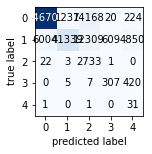


Classification report:
               precision    recall  f1-score   support

         dos       0.98      0.94      0.96    262352
      normal       0.97      0.63      0.77     65111
       probe       0.09      0.99      0.17      2759
         r2l       0.33      0.42      0.37       739
         u2r       0.01      0.94      0.01        33

    accuracy                           0.88    330994
   macro avg       0.47      0.78      0.45    330994
weighted avg       0.97      0.88      0.91    330994


time: 9.05 s (started: 2021-02-21 12:08:23 +02:00)


In [335]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model1.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model1.predict(X_train))
classification = metrics.classification_report(Y_train, model1.predict(X_train))
    
print()
print('============================== { Gaussian Naive Bayes } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [336]:
#Decision Tree 
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

time: 16 ms (started: 2021-02-21 12:08:32 +02:00)


In [337]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528
time: 1.55 s (started: 2021-02-21 12:08:32 +02:00)


In [338]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 1.01 s (started: 2021-02-21 12:08:34 +02:00)


In [339]:
print("Training time: ",end_time-start_time)

Training time:  1.0091502666473389
time: 0 ns (started: 2021-02-21 12:08:35 +02:00)


In [340]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

time: 47 ms (started: 2021-02-21 12:08:35 +02:00)


In [341]:
print("Testing time: ",end_time-start_time)

Testing time:  0.03490567207336426
time: 0 ns (started: 2021-02-21 12:08:35 +02:00)


In [342]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646
time: 547 ms (started: 2021-02-21 12:08:35 +02:00)


C:\Users\Ahmed Glal\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== { Decision Tree } Model Evaluation ==============================

Model Accuracy:
 0.9905829108684749

Confusion matrix:

 [[261658    547    147      0      0]
 [     7  63765   1339      0      0]
 [    16    289   2454      0      0]
 [     1    307    431      0      0]
 [     0     33      0      0      0]]



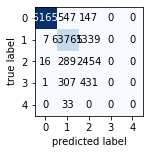


Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    262352
      normal       0.98      0.98      0.98     65111
       probe       0.56      0.89      0.69      2759
         r2l       0.00      0.00      0.00       739
         u2r       0.00      0.00      0.00        33

    accuracy                           0.99    330994
   macro avg       0.51      0.57      0.53    330994
weighted avg       0.99      0.99      0.99    330994


time: 10.1 s (started: 2021-02-21 12:08:36 +02:00)


In [343]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model2.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model2.predict(X_train))
classification = metrics.classification_report(Y_train, model2.predict(X_train))
    
print()
print('============================== { Decision Tree } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [344]:
#RANDOM FOREST
model3 = RandomForestClassifier(n_estimators=30)

time: 15 ms (started: 2021-02-21 12:08:46 +02:00)


In [345]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 7 s (started: 2021-02-21 12:08:46 +02:00)


In [346]:
print("Training time: ",end_time-start_time)

Training time:  7.001537799835205
time: 0 ns (started: 2021-02-21 12:08:53 +02:00)


In [347]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

time: 531 ms (started: 2021-02-21 12:08:53 +02:00)


In [348]:
print("Testing time: ",end_time-start_time)

Testing time:  0.530644416809082
time: 0 ns (started: 2021-02-21 12:08:53 +02:00)


In [349]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999728091747887
Test score is: 0.9996871683831513
time: 1.95 s (started: 2021-02-21 12:08:53 +02:00)



============================== { RANDOM FOREST } Model Evaluation ==============================

Model Accuracy:
 0.9999728091747887

Confusion matrix:

 [[262352      0      0      0      0]
 [     1  65106      4      0      0]
 [     0      3   2756      0      0]
 [     0      0      0    739      0]
 [     0      1      0      0     32]]



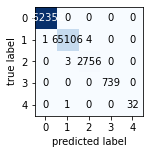


Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    262352
      normal       1.00      1.00      1.00     65111
       probe       1.00      1.00      1.00      2759
         r2l       1.00      1.00      1.00       739
         u2r       1.00      0.97      0.98        33

    accuracy                           1.00    330994
   macro avg       1.00      0.99      1.00    330994
weighted avg       1.00      1.00      1.00    330994


time: 13.2 s (started: 2021-02-21 12:08:55 +02:00)


In [350]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model3.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model3.predict(X_train))
classification = metrics.classification_report(Y_train, model3.predict(X_train))
    
print()
print('============================== { RANDOM FOREST } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [351]:
#SUPPORT VECTOR MACHINE
model4 = SVC(gamma = 'scale')

time: 0 ns (started: 2021-02-21 12:09:08 +02:00)


In [352]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 1min 44s (started: 2021-02-21 12:09:08 +02:00)


In [353]:
print("Training time: ",end_time-start_time)

Training time:  104.37462830543518
time: 0 ns (started: 2021-02-21 12:10:53 +02:00)


In [354]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

time: 27 s (started: 2021-02-21 12:10:53 +02:00)


In [355]:
print("Testing time: ",end_time-start_time)

Testing time:  27.0245521068573
time: 0 ns (started: 2021-02-21 12:11:20 +02:00)


In [356]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059
time: 1min 19s (started: 2021-02-21 12:11:20 +02:00)



============================== { SUPPORT VECTOR MACHINE } Model Evaluation ==============================

Model Accuracy:
 0.9987552644458811

Confusion matrix:

 [[262321     27      2      2      0]
 [    77  64945     13     75      1]
 [     6    102   2650      1      0]
 [     7     79      0    652      1]
 [     2      9      0      8     14]]



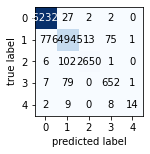


Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    262352
      normal       1.00      1.00      1.00     65111
       probe       0.99      0.96      0.98      2759
         r2l       0.88      0.88      0.88       739
         u2r       0.88      0.42      0.57        33

    accuracy                           1.00    330994
   macro avg       0.95      0.85      0.89    330994
weighted avg       1.00      1.00      1.00    330994


time: 2min 55s (started: 2021-02-21 12:12:40 +02:00)


In [357]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model4.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model4.predict(X_train))
classification = metrics.classification_report(Y_train, model4.predict(X_train))
    
print()
print('============================== { SUPPORT VECTOR MACHINE } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [358]:
#LOGISTIC REGRESSION
model5 = LogisticRegression(max_iter=1200000)

time: 0 ns (started: 2021-02-21 12:15:35 +02:00)


In [359]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 41 s (started: 2021-02-21 12:15:35 +02:00)


In [360]:
print("Training time: ",end_time-start_time)

Training time:  40.95706129074097
time: 0 ns (started: 2021-02-21 12:16:16 +02:00)


In [361]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

time: 31 ms (started: 2021-02-21 12:16:16 +02:00)


In [362]:
print("Testing time: ",end_time-start_time)

Testing time:  0.0388941764831543
time: 0 ns (started: 2021-02-21 12:16:16 +02:00)


In [363]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211
time: 500 ms (started: 2021-02-21 12:16:16 +02:00)



============================== { LOGISTIC REGRESSION } Model Evaluation ==============================

Model Accuracy:
 0.9935285835997028

Confusion matrix:

 [[260897   1436     12      7      0]
 [    86  64883     38    104      0]
 [    21    290   2448      0      0]
 [    12    112      1    614      0]
 [     2     14      0      7     10]]



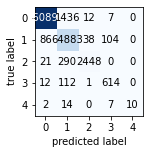


Classification report:
               precision    recall  f1-score   support

         dos       1.00      0.99      1.00    262352
      normal       0.97      1.00      0.98     65111
       probe       0.98      0.89      0.93      2759
         r2l       0.84      0.83      0.83       739
         u2r       1.00      0.30      0.47        33

    accuracy                           0.99    330994
   macro avg       0.96      0.80      0.84    330994
weighted avg       0.99      0.99      0.99    330994


time: 10.1 s (started: 2021-02-21 12:16:17 +02:00)


In [364]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model5.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model5.predict(X_train))
classification = metrics.classification_report(Y_train, model5.predict(X_train))
    
print()
print('============================== { LOGISTIC REGRESSION } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [365]:
#GRADIENT BOOSTING CLASSIFIER
model6 = GradientBoostingClassifier(random_state=0)

time: 0 ns (started: 2021-02-21 12:16:27 +02:00)


In [366]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

time: 5min 56s (started: 2021-02-21 12:16:27 +02:00)


In [367]:
print("Training time: ",end_time-start_time)

Training time:  356.5193567276001
time: 15 ms (started: 2021-02-21 12:22:23 +02:00)


In [368]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

time: 1.16 s (started: 2021-02-21 12:22:23 +02:00)


In [369]:
print("Testing time: ",end_time-start_time)

Testing time:  1.157559871673584
time: 0 ns (started: 2021-02-21 12:22:24 +02:00)


In [370]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856
time: 4.02 s (started: 2021-02-21 12:22:24 +02:00)



============================== { GRADIENT BOOSTING CLASSIFIER } Model Evaluation ==============================

Model Accuracy:
 0.9979304760811374

Confusion matrix:

 [[262306     43      0      3      0]
 [    13  65040     16      6     36]
 [    19     72   2667      1      0]
 [     1    345     20    276     97]
 [     0     13      0      0     20]]



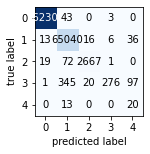


Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    262352
      normal       0.99      1.00      1.00     65111
       probe       0.99      0.97      0.98      2759
         r2l       0.97      0.37      0.54       739
         u2r       0.13      0.61      0.22        33

    accuracy                           1.00    330994
   macro avg       0.82      0.79      0.75    330994
weighted avg       1.00      1.00      1.00    330994


time: 17.7 s (started: 2021-02-21 12:22:28 +02:00)


In [371]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model6.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model6.predict(X_train))
classification = metrics.classification_report(Y_train, model6.predict(X_train))
    
print()
print('============================== { GRADIENT BOOSTING CLASSIFIER } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(3, 2))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

In [372]:
#Artificial Neural Network
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

time: 0 ns (started: 2021-02-21 12:22:46 +02:00)


In [373]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.

model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

time: 0 ns (started: 2021-02-21 12:22:46 +02:00)


In [374]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

Epoch 1/100
5172/5172 [==============================] - 3s 525us/step - loss: 0.3956 - accuracy: 0.9591
Epoch 2/100
5172/5172 [==============================] - 3s 520us/step - loss: 0.0826 - accuracy: 0.9845
Epoch 3/100
5172/5172 [==============================] - 3s 523us/step - loss: 0.0695 - accuracy: 0.9846
Epoch 4/100
5172/5172 [==============================] - 3s 517us/step - loss: 0.0667 - accuracy: 0.9847
Epoch 5/100
5172/5172 [==============================] - 3s 516us/step - loss: 0.0651 - accuracy: 0.9847
Epoch 6/100
5172/5172 [==============================] - 3s 634us/step - loss: 0.0640 - accuracy: 0.9847
Epoch 7/100
5172/5172 [==============================] - 3s 535us/step - loss: 0.0631 - accuracy: 0.9848
Epoch 8/100
5172/5172 [==============================] - 3s 526us/step - loss: 0.0609 - accuracy: 0.9847
Epoch 9/100
5172/5172 [==============================] - 3s 513us/step - loss: 0.0449 - accuracy: 0.9871
Epoch 10/100
5172/5172 [==============================]

In [375]:
print('Training time')
print((end-start))

Training time
278.83765983581543
time: 0 ns (started: 2021-02-21 12:27:25 +02:00)


In [376]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

time: 703 ms (started: 2021-02-21 12:27:25 +02:00)


In [377]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6921498775482178
time: 0 ns (started: 2021-02-21 12:27:26 +02:00)


In [378]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

time: 1.31 s (started: 2021-02-21 12:27:26 +02:00)


In [379]:
accuracy_score(Y_train,Y_train_pred7)

0.9984863773965691

time: 312 ms (started: 2021-02-21 12:27:27 +02:00)


In [380]:
accuracy_score(Y_test,Y_test_pred7)

0.9982579572708815

time: 141 ms (started: 2021-02-21 12:27:27 +02:00)


C:\Users\Ahmed Glal\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== { Artificial Neural Network } Model Evaluation ==============================

Model Accuracy:
 0.9984863773965691

Confusion matrix:

 [[262323      4     20      5      0]
 [    10  64969     53     79      0]
 [     6     28   2692     33      0]
 [     6    113    111    509      0]
 [     0     16      4     13      0]]



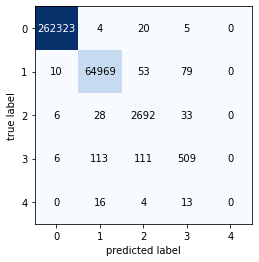


Classification report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00    262352
      normal       1.00      1.00      1.00     65111
       probe       0.93      0.98      0.95      2759
         r2l       0.80      0.69      0.74       739
         u2r       0.00      0.00      0.00        33

    accuracy                           1.00    330994
   macro avg       0.75      0.73      0.74    330994
weighted avg       1.00      1.00      1.00    330994


time: 14 s (started: 2021-02-21 12:27:27 +02:00)


In [381]:
#Plot The Result
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Accuracy = metrics.accuracy_score(Y_train, model7.predict(X_train))
Confusion_matrix = metrics.confusion_matrix(Y_train, model7.predict(X_train))
classification = metrics.classification_report(Y_train, model7.predict(X_train))
    
print()
print('============================== { Artificial Neural Network } Model Evaluation ==============================' )
print()
print ("Model Accuracy:" "\n", Accuracy)
print()
print("Confusion matrix:\n" "\n", Confusion_matrix)
print()
fig, ax = plot_confusion_matrix(conf_mat=Confusion_matrix, figsize=(4, 4))
plt.show()
print()
print("Classification report:" "\n", classification) 
print()

Text(0.5, 1.0, 'TRAINING ACCURACY')

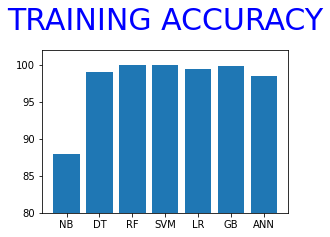

time: 141 ms (started: 2021-02-21 12:27:41 +02:00)


In [382]:
#TRAINING ACCURACY
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,98.485]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)


plt.title(label='TRAINING ACCURACY',  
          fontweight=100,  
          pad='20.0' , color="blue" ,fontsize=30, )

# depicting the visualization 
# fig = plt.figure() 
# ax = fig.add_axes([0,0,1,1]) 
# ax.axis('equal') 
# ax.pie(values, labels = names,  
#        autopct='%1.2f%%') 
  
# displaying the title 
# plt.title(label="Society Food Preferance", 
#           loc="left", 
#           fontstyle='italic')

In [383]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')
# f.savefig('sds.png', facecolor='w',bbox_inches='tight')

time: 109 ms (started: 2021-02-21 12:27:42 +02:00)


Text(0.5, 1.0, 'TESTING ACCURACY')

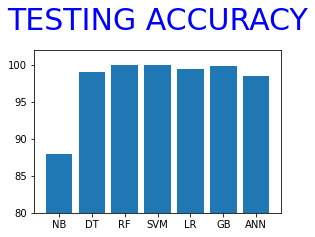

time: 125 ms (started: 2021-02-21 12:27:42 +02:00)


In [384]:
#TESTING ACCURACY
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,98.472]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)
plt.title(label='TESTING ACCURACY',  
          fontweight=100,  
          pad='20.0' , color="blue" ,fontsize=30, )

In [385]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

time: 94 ms (started: 2021-02-21 12:27:42 +02:00)


Text(0.5, 1.0, 'TRAINING TIME')

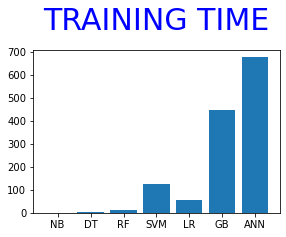

time: 141 ms (started: 2021-02-21 12:27:42 +02:00)


In [386]:
#TRAINING TIME
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099,674.12762]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)
plt.title(label='TRAINING TIME',  
          fontweight=100,  
          pad='20.0' , color="blue" ,fontsize=30, )

In [387]:
f.savefig('train_time_figure.png',bbox_inches='tight')

time: 109 ms (started: 2021-02-21 12:27:42 +02:00)


Text(0.5, 1.0, 'TESTING TIME')

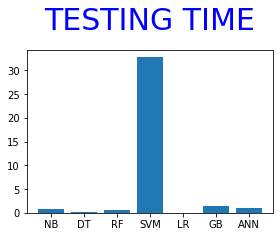

time: 187 ms (started: 2021-02-21 14:08:13 +02:00)


In [404]:
#TESTING TIME
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416,0.96421]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)
plt.title(label='TESTING TIME',  
          fontweight=100,  
          pad='20.0' , color="blue" ,fontsize=30, )

In [389]:
f.savefig('test_time_figure.png',bbox_inches='tight')

time: 110 ms (started: 2021-02-21 12:27:42 +02:00)


In [390]:
#Gaussian Naive Bayes =Accuracy1
#Decision Tree =Accuracy2
#RANDOM FOREST =Accuracy3
#SUPPORT VECTOR MACHINE =Accuracy4
#LOGISTIC REGRESSION =Accuracy5
#GRADIENT BOOSTING CLASSIFIER =Accuracy6
#Artificial Neural Network =Accuracy7

Accuracy1 = metrics.accuracy_score(Y_train, model1.predict(X_train));
Accuracy2 = metrics.accuracy_score(Y_train, model2.predict(X_train))
Accuracy3 = metrics.accuracy_score(Y_train, model3.predict(X_train))
Accuracy4 = metrics.accuracy_score(Y_train, model4.predict(X_train))
Accuracy5 = metrics.accuracy_score(Y_train, model5.predict(X_train))
Accuracy6 = metrics.accuracy_score(Y_train, model6.predict(X_train))
Accuracy7 = '0.999114787579231'

print()
print('=================================== Model Test Results ===================================')
print('|                                           |                                             |')
print('|            MODELS                         |               ACCURACY                      |')
print('|          ----------                       |              ------------                   |')
print('|                                           |                                             |')
print('|       {GAUSSIAN NAIVE BAYES} Model                     ',Accuracy1,'                     |')    
print('|       {DECISION TREE} Model                            ',Accuracy2,'                     |')    
print('|       {RANDOM FOREST} Model                            ',Accuracy3,'                     |')    
print('|       {SUPPORT VECTOR MACHINE} Model                   ',Accuracy4,'                     |')    
print('|       {LOGISTIC REGRESSION} Model                      ',Accuracy5,'                     |')    
print('|       {GRADIENT BOOSTING CLASSIFIER} Model             ',Accuracy6,'                     |')    
print('|       {Artificial Neural Network} Model                ',Accuracy7,'                     |')    

print('|                                           |                                             |')
print('==========================================================================================')   



=================================== Model Test Results ===================================
|                                           |                                             |
|            MODELS                         |               ACCURACY                      |
|          ----------                       |              ------------                   |
|                                           |                                             |
|       {GAUSSIAN NAIVE BAYES} Model                      0.8795114110829804                      |
|       {DECISION TREE} Model                             0.9905829108684749                      |
|       {RANDOM FOREST} Model                             0.9999728091747887                      |
|       {SUPPORT VECTOR MACHINE} Model                    0.9987552644458811                      |
|       {LOGISTIC REGRESSION} Model                       0.9935285835997028                      |
|       {GRADIENT BOOSTING CLASSIFIER} M

In [391]:
All_Result = pd.DataFrame({'MODEL':['Gaussian Naive Bayes Model','Decision Tree Model','RANDOM FOREST Model','SUPPORT VECTOR MACHINE Model','LOGISTIC REGRESSION Model','GRADIENT BOOSTING CLASSIFIER Model','Artificial Neural Network'],
                   'Accuracy':[0.8795114110829804,0.9905829108684749,0.9999788515803912,0.9987552644458811,0.9935285835997028,0.9979304760811374,0.999114787579231],
                   'Training Time':['12.5 s','19.3 s','12.5 s','3.35 s','2min 55s','36min 9s','5min 14s']})

All_Result

,MODEL,Accuracy,Training Time
0,Gaussian Naive Bayes Model,0.879511,12.5 s
1,Decision Tree Model,0.990583,19.3 s
2,RANDOM FOREST Model,0.999979,12.5 s
3,SUPPORT VECTOR MACHINE Model,0.998755,3.35 s
4,LOGISTIC REGRESSION Model,0.993529,2min 55s
5,GRADIENT BOOSTING CLASSIFIER Model,0.997930,36min 9s
6,Artificial Neural Network,0.999115,5min 14s


time: 16 ms (started: 2021-02-21 12:28:42 +02:00)


In [392]:
excel_writer = pd.ExcelWriter('All_Result.xlsx', engine='xlsxwriter')
All_Result.to_excel(excel_writer)
excel_writer.save()

time: 31 ms (started: 2021-02-21 12:28:42 +02:00)
